In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
%config InlineBackend.figure_format = 'svg'

np.random.seed(3) # uncomment to get exactly the results from the slides

In [2]:
def plot_sin_cos(suffix, observations, sin_x, sin_y, cos_x, cos_y):
    """
    Create a sin/cos plot as we want them
    """
    fig = plt.figure(figsize=(8, 4))
    fig.add_subplot(1, 2, 1)
    plt.title('sin(x)' + suffix)
    plt.ylim([-3, 3])
    plt.plot(input_range, observations['sin'], 'b.', alpha=0.75)
    if sin_x is not None:
        plt.plot(sin_x, sin_y, 'r-', linewidth=2)

    fig.add_subplot(1, 2, 2)
    plt.title('cos(x)' + suffix)
    plt.ylim([-3, 3])
    plt.plot(input_range, observations['cos'], 'b.', alpha=0.75)
    if cos_x is not None:
        plt.plot(cos_x, cos_y, 'r-', linewidth=2)

    plt.show()

## Generate the Data

In [3]:
n_samples = 25

input_range = np.linspace(0, 2*np.pi, n_samples, dtype=np.float64)
observations = pd.DataFrame()
observations['sin'] = (np.sin(input_range)
        + np.random.normal(0, 0.5, n_samples))
observations['cos'] = (np.cos(input_range)
        + np.random.normal(0, 0.25, n_samples))

## Scatterplot

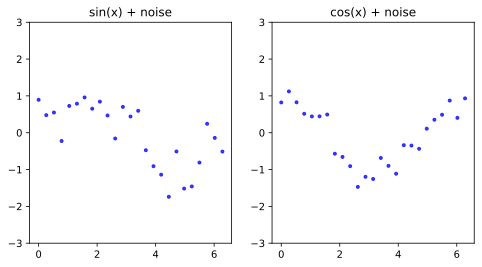

In [4]:
plot_sin_cos(' + noise', observations, None, None, None, None)

## LOESS

In [5]:
smoothed_sin = lowess(observations['sin'], input_range, frac=0.4)
smoothed_cos = lowess(observations['cos'], input_range, frac=0.3)

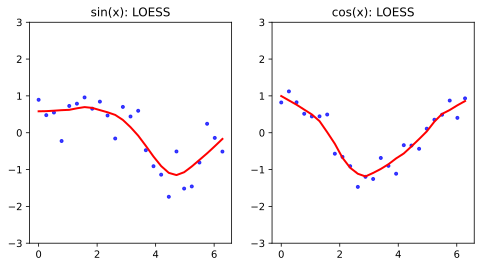

In [6]:
plot_sin_cos(': LOESS', observations, smoothed_sin[:, 0], smoothed_sin[:, 1], smoothed_cos[:, 0], smoothed_cos[:, 1])

## Kalman Filtering: no predictions

In [7]:
from pykalman import KalmanFilter
dim = 2
initial_value_guess = observations.iloc[0]
observation_covariance = np.diag([0.5, 0.25]) ** 2

In [8]:
kf = KalmanFilter(
    initial_state_mean=initial_value_guess,
    initial_state_covariance=observation_covariance,
    observation_covariance=observation_covariance
)
pred_state, state_cov = kf.smooth(observations)

In [14]:
print(pred_state)

[[ 0.71518749  0.77102343]
 [ 0.48284285  0.87614493]
 [ 0.2821107   0.77026551]
 [ 0.12891323  0.58848387]
 [ 0.12081049  0.45043007]
 [ 0.08691431  0.33535259]
 [ 0.0226198   0.14655226]
 [-0.03390942 -0.28574163]
 [-0.02335781 -0.56581067]
 [-0.01887104 -0.81973198]
 [ 0.02954559 -1.05561352]
 [ 0.16649911 -1.04586786]
 [ 0.20477559 -0.96150101]
 [ 0.14508942 -0.75478919]
 [-0.04263071 -0.70264299]
 [-0.18938172 -0.65327031]
 [-0.30471273 -0.41684915]
 [-0.39260654 -0.30808595]
 [-0.34357675 -0.20307822]
 [-0.37773945  0.04177098]
 [-0.36503026  0.24041999]
 [-0.29145001  0.40398603]
 [-0.23645826  0.5712076 ]
 [-0.31607861  0.57488232]
 [-0.46764234  0.66622024]]


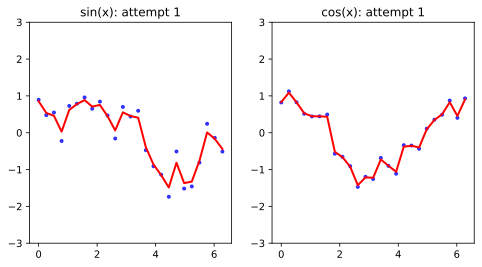

In [9]:
plot_sin_cos(': attempt 1', observations, input_range, pred_state[:, 0], input_range, pred_state[:, 1])

## Kalman Filtering: good prediction

In [10]:
delta_t = np.pi * 2 / n_samples
transition_matrix = [[1, delta_t], [-delta_t, 1]]
transition_covariance = np.diag([0.2, 0.2]) ** 2
kf = KalmanFilter(
    initial_state_mean=initial_value_guess,
    initial_state_covariance=observation_covariance,
    observation_covariance=observation_covariance,
    transition_covariance=transition_covariance,
    transition_matrices=transition_matrix
)
pred_state, state_cov = kf.smooth(observations)


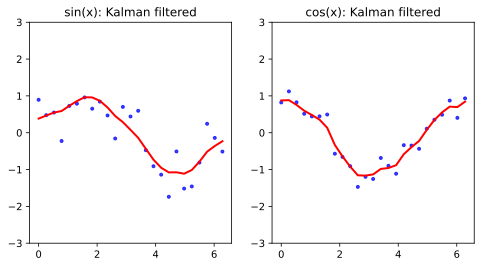

In [11]:
plot_sin_cos(': Kalman filtered', observations, input_range, pred_state[:, 0], input_range, pred_state[:, 1])

In [12]:
transition_matrix = [[1, -delta_t], [delta_t, 1]]
kf = KalmanFilter(
    initial_state_mean=initial_value_guess,
    initial_state_covariance=observation_covariance,
    observation_covariance=observation_covariance,
    transition_covariance=transition_covariance,
    transition_matrices=transition_matrix
)
pred_state, state_cov = kf.smooth(observations)

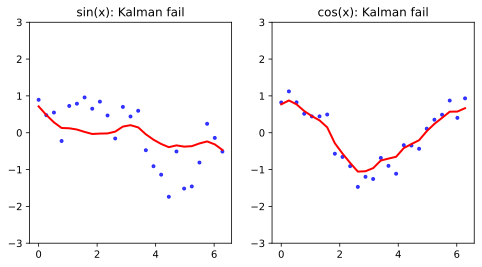

In [13]:
plot_sin_cos(': Kalman fail', observations, input_range, pred_state[:, 0], input_range, pred_state[:, 1])